In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from game import Game
import numpy as np
import logging
import pprint

### 3 Players plays

In [10]:
%%time
num_iteration = 10000
moneys = {0:[],1:[],2:[]}
for i in range(num_iteration):
    game = Game(['basic', 'basic', 'basic'],
                start_moneys=[100, 100, 100],
                bet=1,
                number_of_decks=6,
                logging_level="info")
    game.play_game()
    for player in game.players:
        moneys[player.id].append(player.moneys)
for key in moneys:
    print("Player:{} average:{:.3f}".format(key,sum([money[-1] for money in moneys[key]])/len(moneys[key])))

Player:0 average:98.922
Player:1 average:98.914
Player:2 average:98.917
CPU times: user 34.9 s, sys: 171 ms, total: 35.1 s
Wall time: 35 s


In [11]:
%%time
num_iteration = 10000
moneys = {0:[]}
for i in range(num_iteration):
    game = Game(players=['basic'],
                start_moneys=[100],
                bet=1,
                number_of_decks=6,
                logging_level='info')
    game.play_game()
    for player in game.players:
        moneys[player.id].append(player.moneys)
for key in moneys:
    print("Player:{} average:{:.3f}".format(key,sum([money[-1] for money in moneys[key]])/len(moneys[key])))

Player:0 average:97.838
CPU times: user 31.6 s, sys: 133 ms, total: 31.7 s
Wall time: 31.6 s


In [13]:
%%time
num_iteration = 10000
moneys = {0:[],1:[],2:[],3:[],4:[]}
for i in range(num_iteration):
    game = Game(['basic', 'basic', 'basic', 'basic', 'basic'],
                start_moneys=[100, 100, 100, 100, 100],
                bet=1,
                number_of_decks=6,
                logging_level="info")
    game.play_game()
    for player in game.players:
        moneys[player.id].append(player.moneys)
for key in moneys:
    print("Player:{} average:{:.3f}".format(key,sum([money[-1] for money in moneys[key]])/len(moneys[key])))

Player:0 average:99.278
Player:1 average:99.276
Player:2 average:99.289
Player:3 average:99.247
Player:4 average:99.315
CPU times: user 36.1 s, sys: 154 ms, total: 36.3 s
Wall time: 36.2 s


In [14]:
%%time
num_iteration = 10000
moneys = {0:[],1:[],2:[],3:[],4:[],5:[],6:[]}
for i in range(num_iteration):
    game = Game(['basic', 'basic', 'basic', 'basic', 'basic', 'basic', 'basic'],
                start_moneys=[100, 100, 100, 100, 100, 100, 100],
                bet=1,
                number_of_decks=6,
                logging_level="info")
    game.play_game()
    for player in game.players:
        moneys[player.id].append(player.moneys)
for key in moneys:
    print("Player:{} average:{:.3f}".format(key,sum([money[-1] for money in moneys[key]])/len(moneys[key])))

Player:0 average:99.523
Player:1 average:99.539
Player:2 average:99.490
Player:3 average:99.486
Player:4 average:99.554
Player:5 average:99.498
Player:6 average:99.500
CPU times: user 37.2 s, sys: 166 ms, total: 37.3 s
Wall time: 37.3 s


In [15]:
%%time
num_iteration = 10000
moneys = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
for i in range(num_iteration):
    game = Game(['basic', 'basic', 'basic', 'basic', 'basic', 'basic', 'basic', 'basic', 'basic', 'basic'],
                start_moneys=[100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
                bet=1,
                number_of_decks=6,
                logging_level="info")
    game.play_game()
    for player in game.players:
        moneys[player.id].append(player.moneys)
for key in moneys:
    print("Player:{} average:{:.3f}".format(key,sum([money[-1] for money in moneys[key]])/len(moneys[key])))

Player:0 average:99.631
Player:1 average:99.639
Player:2 average:99.687
Player:3 average:99.652
Player:4 average:99.673
Player:5 average:99.676
Player:6 average:99.642
Player:7 average:99.629
Player:8 average:99.655
Player:9 average:99.704
CPU times: user 36.1 s, sys: 150 ms, total: 36.2 s
Wall time: 36.2 s


<IPython.core.display.Javascript object>


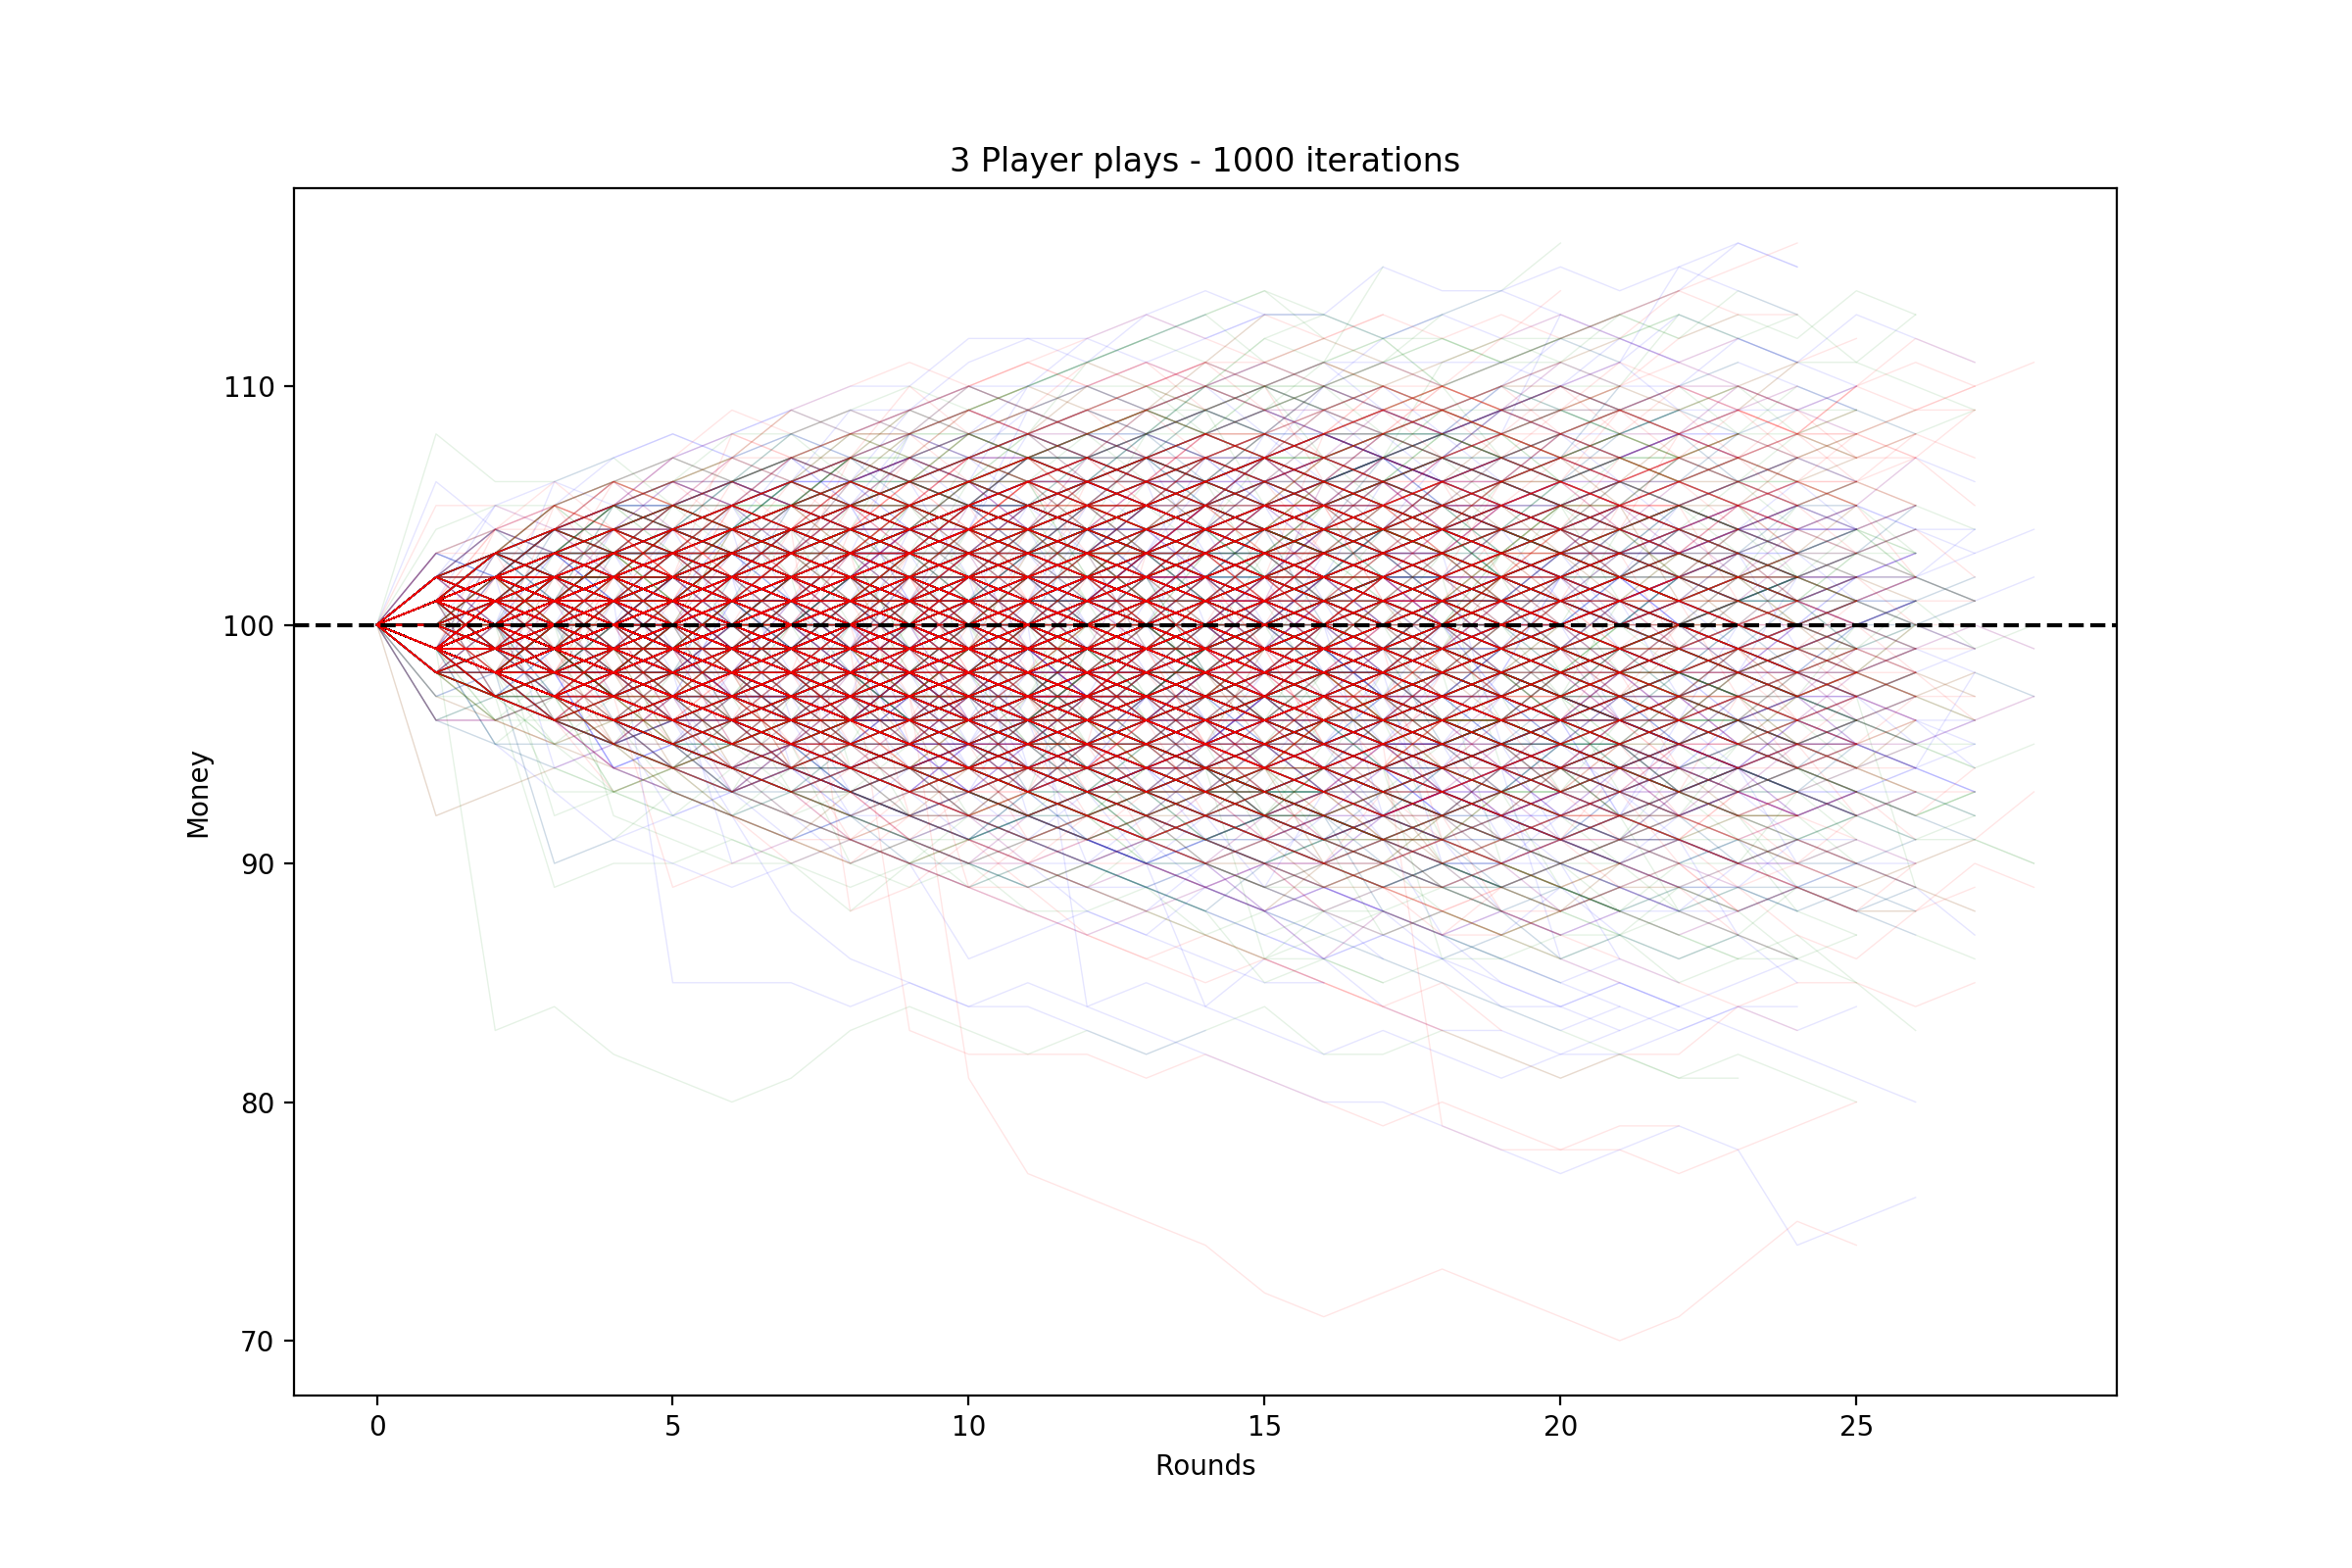

CPU times: user 7.41 s, sys: 74.7 ms, total: 7.48 s
Wall time: 7.49 s


In [4]:
# %%time
# colors = {0: 'b-', 1: 'g-', 2: 'r-'}
# plt.figure(figsize=(12,8))

# for key in moneys:
#     for money in moneys[key]:
#         plt.plot(money, colors[key], alpha=0.10, linewidth=0.5)
# plt.title("3 Player plays - {} iterations".format(num_iteration))
# plt.xlabel("Rounds")
# plt.ylabel("Money")
# plt.axhline(y=moneys[0][0][0], color='k', linestyle='--')
# plt.savefig("figures/3-player-plays.png")

In [8]:
for key in moneys:
    print("Player:{} average:{:.3f}".format(key,sum([money[-1] for money in moneys[key]])/len(moneys[key])))

Player:0 average:98.738
Player:1 average:98.940
Player:2 average:99.270


### Single plays

In [4]:
%%time
num_iteration = 10000
moneys = []
for i in range(num_iteration):
    game = Game(players=['basic'],
                start_moneys=[100],
                bet=1,
                number_of_decks=6,
                logging_level='info')
    game.play_game()
    for player in game.players:
        moneys.append(player.moneys)

CPU times: user 32.6 s, sys: 183 ms, total: 32.8 s
Wall time: 32.8 s


CPU times: user 59.2 s, sys: 301 ms, total: 59.5 s
Wall time: 59.5 s


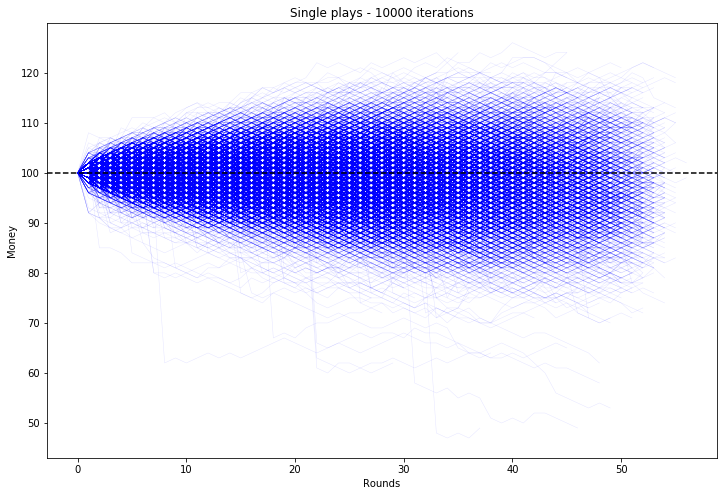

In [8]:
%%time
plt.figure(figsize=(12,8))
for money in moneys:
    plt.plot(money, 'b-', alpha=0.10, linewidth=0.5)
plt.title("Single plays - {} iterations".format(num_iteration))
plt.xlabel("Rounds")
plt.ylabel("Money")
plt.axhline(y=moneys[0][0], color='k', linestyle='--')
plt.savefig("figures/singleplays.png")

In [9]:
sum([money[-1] for money in moneys])/len(moneys)

97.8505

### Continues plays

In [21]:
"""
Player continuesly plays (money lingers)
"""
num_iteration = 10000
moneys = [[100]]
for i in range(num_iteration):
    game = Game(players=['basic'],
                start_moneys=[moneys[-1][-1]],
                bet=1,
                number_of_decks=6,
                logging_level='info')
    game.play_game()
    for player in game.players:
        moneys.append(player.moneys)
# discard first element
moneys = moneys[1:]

<IPython.core.display.Javascript object>


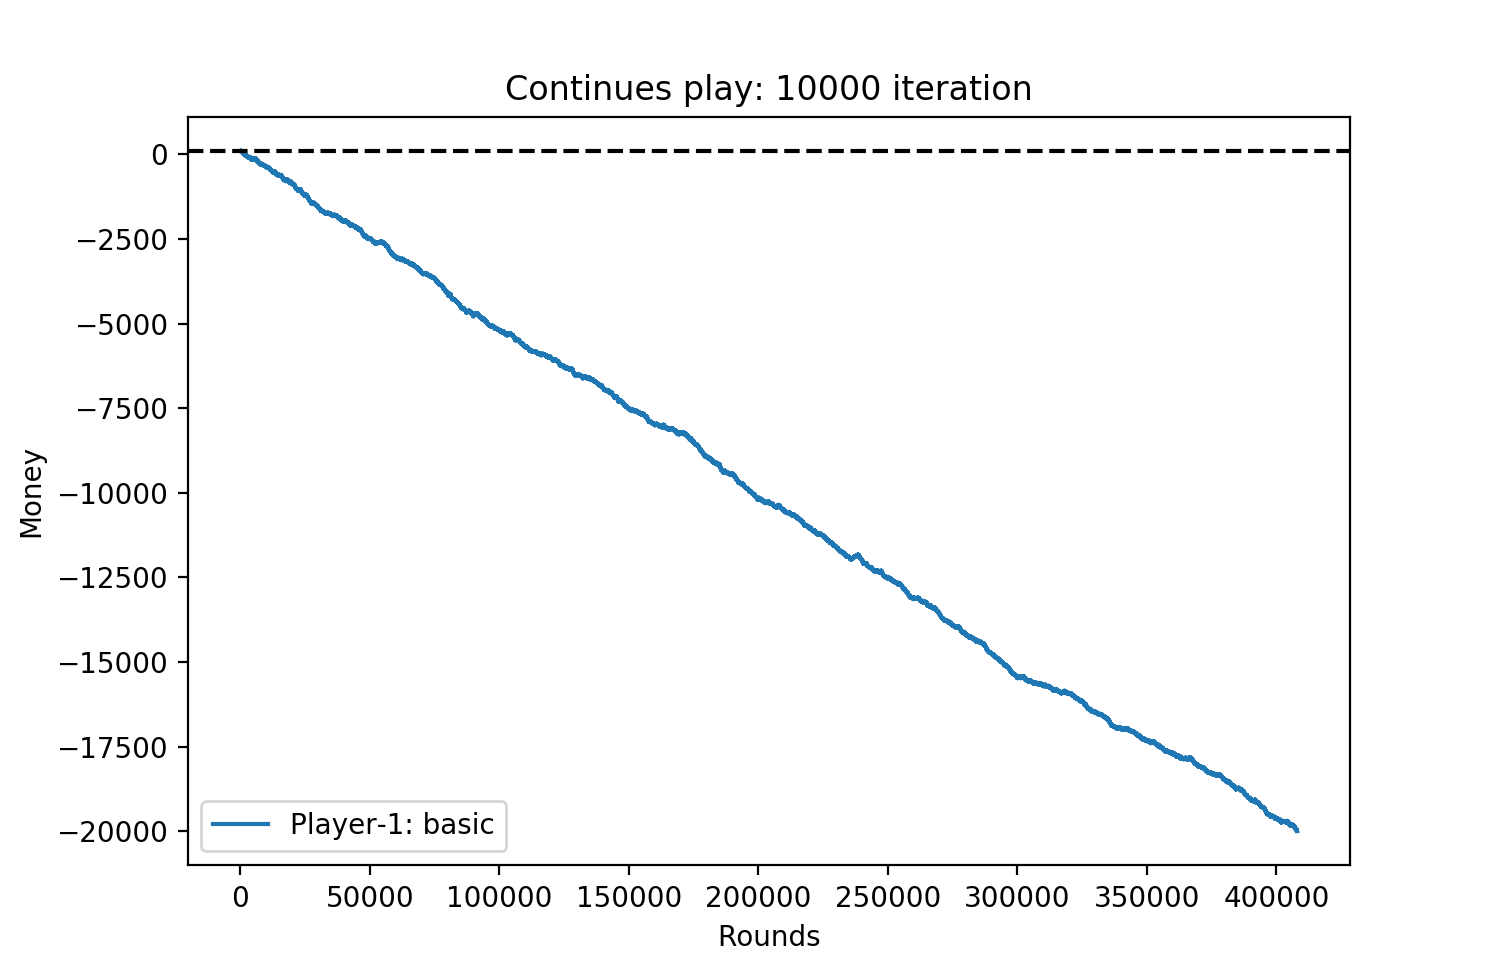

In [22]:
moneys_flat = [m for money in moneys for m in money]
game_finishes = [0]
for money in moneys:
    game_finishes.append(game_finishes[-1]+len(money))
game_finishes = game_finishes[1:]
plt.plot(moneys_flat, label='Player-1: basic')
plt.title("Continues play: {} iteration".format(num_iteration))
plt.legend()
plt.ylabel("Money")
plt.xlabel("Rounds")
plt.axhline(y=moneys_flat[0], color='k', linestyle='--')
# for gf in game_finishes:
#     plt.axvline(x=gf, color='k', linestyle='--')

In [7]:
game_finishes

[0, 38, 69]